# Import packages

In [7]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os
import copy 
# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe
import coolpuppy
from coolpuppy import coolpup, plotpup
import cooler
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from cooltools.lib import common, checks

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

10


In [8]:
figDir = '../figure/TAD'
os.makedirs(figDir, exist_ok=True)
coolDir = "../data/cool_norm_pooled"
outDir = "../data/TAD"
os.makedirs(outDir, exist_ok=True)

In [9]:
clr = cooler.Cooler(os.path.join(coolDir, "G1DMSO_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_DMSO = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1dTAG_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_dTAG = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1A485_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_A485 = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncUT_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_UT = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncAID_pooled_5000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_AID = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr8', 'chr8'): 160
INFO:coolpuppy:('chr9', 'chr9'): 185
INFO:coolpuppy:('chr5', 'chr5'): 191
INFO:coolpuppy:('chr4', 'chr4'): 204
INFO:coolpuppy:('chr3', 'chr3'): 209
INFO:coolpuppy:('chr6', 'chr6'): 211
INFO:coolpuppy:('chr10', 'chr10'): 193
INFO:coolpuppy:('chr7', 'chr7'): 194
INFO:coolpuppy:('chr15', 'chr15'): 147
INFO:coolpuppy:('chr13', 'chr13'): 167
INFO:coolpuppy:('chr11', 'chr11'): 172
INFO:coolpuppy:('chr19', 'chr19'): 93
INFO:coolpuppy:('chr2', 'chr2'): 263
INFO:coolpuppy:('chr16', 'chr16'): 137
INFO:coolpuppy:('chr14', 'chr14'): 139
INFO:coolpuppy:('chr18', 'chr18'): 134
INFO:coolpuppy:('chr12', 'chr12'): 138
INFO:coolpuppy:('chr1', 'chr1'): 259
INFO:coolpuppy:('chr17', 'chr17'): 121
INFO:coolpuppy:('chrX', 'chrX'): 174
INFO:coolpuppy:Total number of piled up windows: 3491
INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr10', 'chr10'): 193
INFO:coolpuppy:(

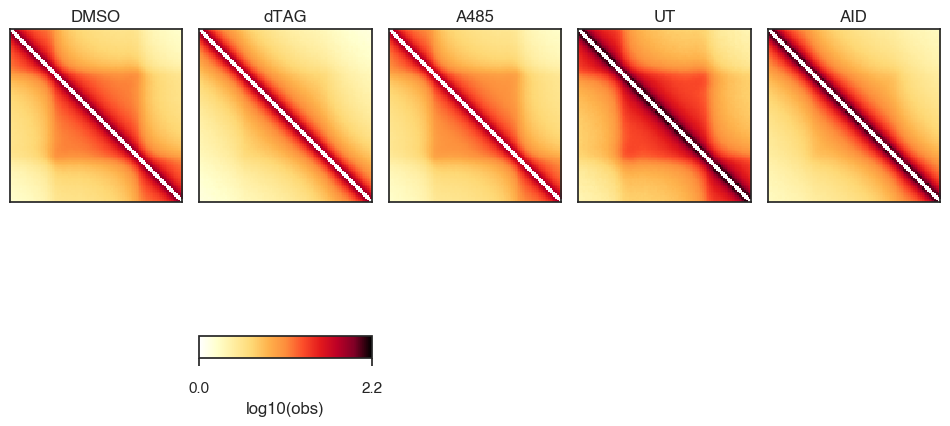

In [45]:
from matplotlib import gridspec

mats = [
    np.log10(pileup_df_DMSO.data[0]*10000),
    np.log10(pileup_df_dTAG.data[0]*10000),
    np.log10(pileup_df_A485.data[0]*10000),
    np.log10(pileup_df_UT.data[0]*10000),
    np.log10(pileup_df_AID.data[0]*10000),

]
labels = ["DMSO", "dTAG", "A485", "UT", "AID"]

# create figure and a 2×2 GridSpec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(
    nrows=2,
    ncols=5,
    height_ratios=[1, 0.05],   # top row 1x, bottom row 0.15x
    width_ratios=[1, 1, 1, 1, 1],       # two equal columns
    hspace=0,
    wspace=0.1
)

# top-left and top-right axes for heatmaps
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])

vmin = 0
vmax = 2.2

for ax, mat, title in zip((ax0, ax1, ax2, ax3, ax4), mats, labels):
    im = ax.imshow(
        mat,
        origin="lower",
        interpolation="nearest",
        cmap="fall",
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_xaxis()  

# bottom-right axis for the colorbar
cax = fig.add_subplot(gs[1, 1])
cb = fig.colorbar(im, cax=cax, orientation="horizontal")
cb.set_ticks([vmin, vmax])      # only left & right tick
cb.set_label("log10(obs)")


plt.savefig(os.path.join(figDir, f'ADA.svg'), format = 'svg')
plt.savefig(os.path.join(figDir, f'ADA.png'), format = 'png')

plt.show()
